

```
layers
---
Conv2D
MaxPooling
Conv2D
Average Pooling //여기까지가 feature extraction
--- 베이스모델
Flatten()
Dense()
Dense()
 '
 '
 '
```



In [ ]:
import tensorflow as tf

from tensorflow.keras.applications import VGG16

In [ ]:
# include_top, weights, input_shape 은 필수
# train 안 하고 그대로 사용해볼 거라 인클루드탑 트루. 바꿀 거면 false
# 이미지넷의 인풋 쉐잎은 224x224x3
base_model = VGG16(include_top = True,  # false로 하면 Flatten 이하로 없어짐. 직접 만들 거면  false로 하고 flatten, dense 직접 만들기.
                   weights = 'imagenet',
                   input_shape = (224, 224, 3))
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)



```
compile, fit 할 필요 없음.
원하는 이미지 가져와서 predict 하고 결과값 잘 나왔는지 확인
base_model.predict(image)
image preprocessing -> resize, color, scale, batch_size(dimension 맞추기)
```



In [ ]:
import cv2

In [ ]:
img2 = cv2.imread('/content/달.png')
img = cv2.imread('/content/brocoli.webp')
print(img2.shape)

(473, 620, 3)


In [ ]:
import numpy as np


img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_resized = cv2.resize(img2_rgb, (224, 224))
im2g_scaled = img2_resized / 255.0

img2_input = np.expand_dims(img2_resized, axis = 0)

print(img2_resized.shape)


(224, 224, 3)


In [ ]:
prediction2 = base_model.predict(img2_input)
print(np.argmax(prediction2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
574


In [ ]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

[[('n03445777', 'golf_ball', 0.99041194), ('n09229709', 'bubble', 0.007212935), ('n03942813', 'ping-pong_ball', 0.00082169793), ('n04286575', 'spotlight', 0.0006227442), ('n02782093', 'balloon', 0.0005051873)]]
golf_ball


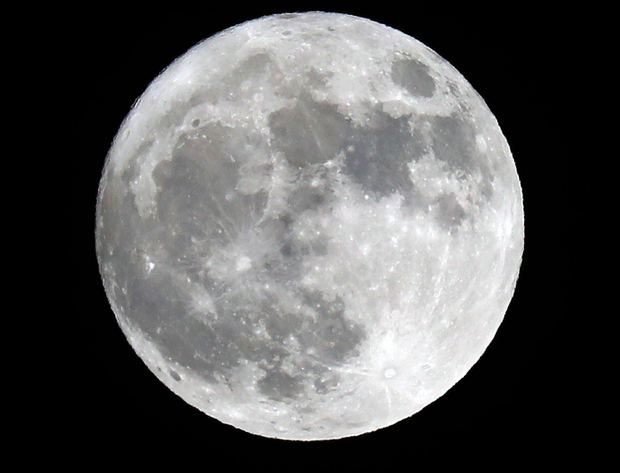

In [ ]:
result2_name = decode_predictions(prediction2)
print(result2_name)
print(result2_name[0][0][1])
cv2_imshow(img2)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

(600, 600, 3)


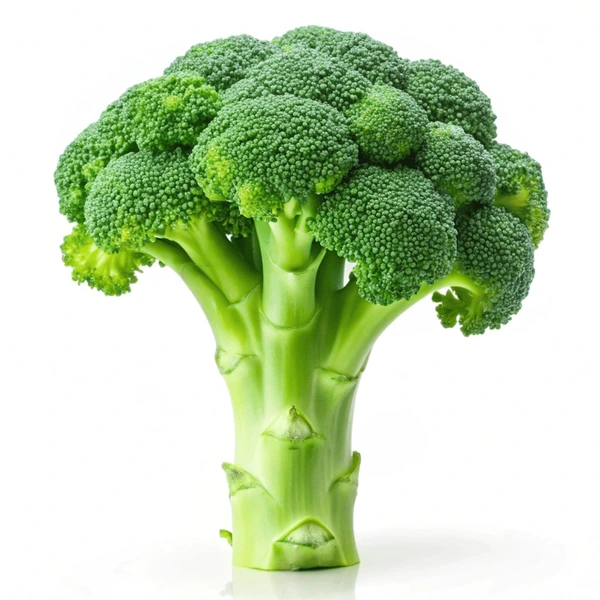

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
937
[[('n07714990', 'broccoli', 0.9994205), ('n07715103', 'cauliflower', 0.00057826936), ('n07714571', 'head_cabbage', 1.0412099e-06), ('n07716358', 'zucchini', 2.3902931e-08), ('n04522168', 'vase', 2.2979158e-08)]]
broccoli


In [ ]:
def data_preprocessing(img):
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (224, 224))
  img_scaled = preprocess_input(img_resized)
  img_batch = np.expand_dims(img_scaled, axis = 0)
  return img_batch

print(img.shape)

from google.colab.patches import cv2_imshow
cv2_imshow(img)
img_input = data_preprocessing(img)

prediction = base_model.predict(img_input)
print(np.argmax(prediction))

result_name = decode_predictions(prediction)
print(result_name)
print(result_name[0][0][1])

In [ ]:
moon_input = data_preprocessing(img2)
moon_pred = base_model.predict(moon_input)
result = decode_predictions(moon_pred)
print(result[0][0][1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
golf_ball


In [ ]:
sandwich = cv2.imread('/content/sandwich.png')
sandwich_input = data_preprocessing(sandwich)

prediction3 = base_model.predict(sandwich_input)
print(np.argmax(prediction3))

result3_name = decode_predictions(prediction3)
print(f'{result3_name[0][0][1]}:{result3_name[0][0][2]*100}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step
415
bakery:51.97770595550537%


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions

def data_preprocessing2(img):
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (224, 224))
  img_scaled = preprocess_input(img_resized)
  img_batch = np.expand_dims(img_scaled, axis = 0)
  return img_batch

moon_input = data_preprocessing(img2)

moon_pred = base_model.predict(moon_input)
print(np.argmax(moon_pred))

result_name = decode_predictions(moon_pred)
print(result_name)
print(result_name[0][0][1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
574
[[('n03445777', 'golf_ball', 0.97007453), ('n01910747', 'jellyfish', 0.011799171), ('n09229709', 'bubble', 0.00792647), ('n04286575', 'spotlight', 0.0045632846), ('n03447721', 'gong', 0.0010921168)]]
golf_ball




```
transfer learning
models: (224, 224, 3)

base_model(include_top = False)
Flatten()
Dense()
Dense()
Dense()
```



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
base_model2 = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (224, 224, 3))
base_model2.trainable = False

model = Sequential([
    base_model2,
    Flatten(), #base_model에 이미 input_shape잡혀있음
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,322,794 (62.27 MB)

 Trainable params: 1,608,106 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
#functional로 사용해보기
from tensorflow.keras.models import Sequential, Model

In [ ]:
# model = Model(inputs, outputs) 인풋과 아웃풋 명시해줘야함
inputs = base_model2.input
x = base_model2.output
x = Flatten()(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
outputs = Dense(2, activation = 'softmax')(x)


model2 = Model(inputs = inputs, outputs = outputs)
model2.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,322,530 (62.27 MB)

 Trainable params: 1,607,842 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# data  준비, preprocessing
!pip install simple_image_download

In [ ]:
class_name = ['moon']

In [ ]:
from simple_image_download import simple_image_download as sid
import os

In [ ]:
response = sid.simple_image_download
for c in class_name:
  response().download(c, 11)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.layers import RandomRotation, RandomZoom, RandomBrightness, RandomFlip, Resizing
from tensorflow.keras.models import Sequential
import numpy as np

In [ ]:
data_argumentation = Sequential([
    RandomRotation(0.2, input_shape = (224, 224)),
    RandomFlip('vertical'),#'horizontal
    RandomBrightness(0.8),
    RandomZoom(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
base_dir = '/content/simple_images'
X_data = []
y_data = []
###########################################
for i, c  in enumerate(class_name):       #
    folder_dir = os.path.join(base_dir, c)#
###########################################
    for file_name in os.listdir(folder_dir):
      img_file = os.path.join(folder_dir, file_name)
      img = cv2.imread(img_file)
      img_resized = cv2.resize(img, (224, 224))
      img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
      X_data.append(img_rgb)
      y_data.append(i)

X_data = np.array(X_data)
y_data = np.array(y_data)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7, 224, 224, 3)
(3, 224, 224, 3)
(7,)
(3,)


In [ ]:
model2.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model2.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.8571 - loss: 0.5838
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00


In [ ]:
!rm -rf /content/simple_images/moon/moon_1.jpg